In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ridge_regression, Lasso, ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [6]:
df = pd.read_csv('C:\\Users\\LENOVO\\Documents\\My_Documents\\Coding projects\\Laptop price prediction\\dataset\\Laptop_data_refined.csv')

In [7]:
df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,OpSys,Price,ScreenType,Gpu_Model,...,ScreenType_IPS Panel Full HD,ScreenType_IPS Panel Quad HD,ScreenType_IPS Panel Retina Display,ScreenType_IPS Panel Touchscreen,ScreenType_QHD,ScreenType_Quad HD,ScreenType_Regular,ScreenType_Touchscreen,Gpu_Model_freq,ScreenResolution_freq
0,Apple,13.3,2560x1600,Intel,8,128GB,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,...,0,0,1,0,0,0,0,0,8,13
1,Apple,13.3,1440x900,Intel,8,128GB,macOS,47895.52,Regular,HD Graphics 6000,...,0,0,0,0,0,0,1,0,5,4
2,Apple,15.4,2880x1800,Intel,16,512GB,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,...,0,0,1,0,0,0,0,0,1,4
3,Apple,13.3,2560x1600,Intel,8,256GB,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,...,0,0,1,0,0,0,0,0,2,13
4,Acer,15.6,1366x768,AMD,4,500GB,Windows 10,21312.00,Regular,Radeon R5,...,0,0,0,0,0,0,1,0,11,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,Acer,15.6,1920x1080,Intel,16,512GB,Windows 11,128000.00,Full HD,GeForce RTX 3060,...,0,0,0,0,0,0,0,0,6,809
1248,Asus,17.3,2560x1440,Intel,32,2TB,Windows 11,295000.00,QHD,GeForce RTX 4080,...,0,0,0,0,1,0,0,0,3,27
1249,Razer,16.0,2560x1600,Intel,32,1TB,Windows 11,275000.00,QHD,GeForce RTX 4080,...,0,0,0,0,1,0,0,0,3,13
1250,MSI,15.6,1920x1080,Intel,16,1TB,Windows 11,152000.00,Full HD,GeForce RTX 3070,...,0,0,0,0,0,0,0,0,3,809


In [14]:
df.columns

Index(['Company', 'Inches', 'ScreenResolution', 'Cpu_Company', 'Ram_in_GB',
       'Memory', 'OpSys', 'Price', 'ScreenType', 'Gpu_Model', 'Cpu_Model',
       'Memory_Type', 'Company_freq', 'Ram_in_GB_freq', 'Inches_freq',
       'Memory_freq', 'Gpu_Company_orig', 'Gpu_Company_Amd', 'Gpu_Company_Arm',
       'Gpu_Company_Intel', 'Gpu_Company_Nvidia', 'OpSys_freq',
       'ScreenType_Full HD ', 'ScreenType_IPS Panel ',
       'ScreenType_IPS Panel Full HD ', 'ScreenType_IPS Panel Quad HD',
       'ScreenType_IPS Panel Retina Display ',
       'ScreenType_IPS Panel Touchscreen ', 'ScreenType_QHD ',
       'ScreenType_Quad HD', 'ScreenType_Regular', 'ScreenType_Touchscreen ',
       'Gpu_Model_freq', 'ScreenResolution_freq'],
      dtype='object')

In [13]:
df.groupby('Company')['Price'].sum().reset_index()

,Company,Price
0,ASUS,360000.00
1,Acer,4012645.43
2,Apple,1750150.49
3,Asus,9551489.93
4,Chuwi,50237.18
5,Dell,19315084.03
6,Fujitsu,116523.36
7,Google,268158.24
8,HP,15592890.91
9,Huawei,151741.44


<Axes: xlabel='Ram_in_GB', ylabel='Price'>

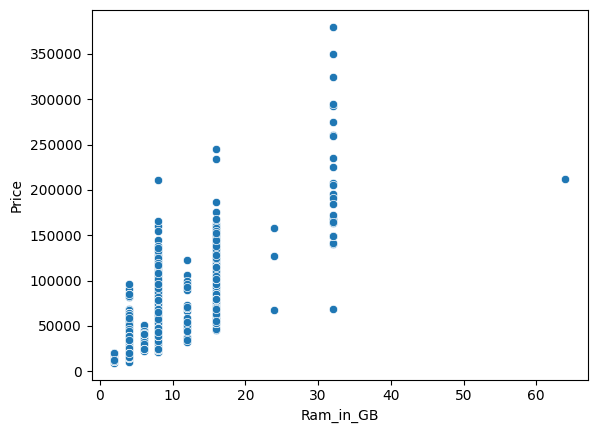

In [15]:
sns.scatterplot(data=df,x='Ram_in_GB',y='Price')

<Axes: xlabel='Ram_in_GB', ylabel='Price'>

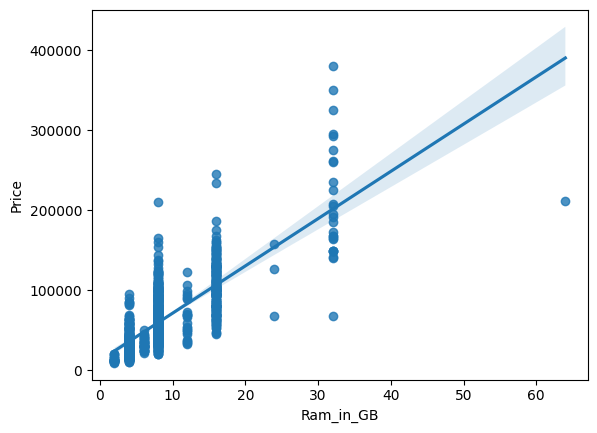

In [16]:
sns.regplot(data=df,x='Ram_in_GB',y='Price')

<Axes: xlabel='Price', ylabel='Count'>

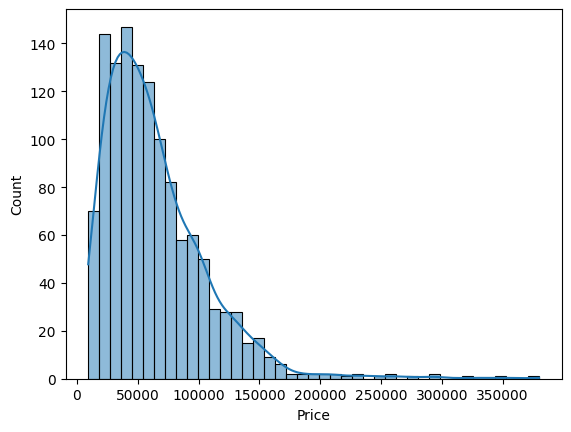

In [17]:
sns.histplot(df['Price'], kde=True)

this is highly left skewed